# 指南者教育训练营
## 项目: 基于机器学习挖掘天猫评论情感倾向


恭喜大家进入到此训练营的最后一个环节！在这个文件中，部分的模版代码已经写好啦，但你还需要补充一些功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

- **项目背景**：新闻、评论等文本数据的情感倾向分析在各行各业都得到了广泛的应用。对于天猫、京东等平台电商来说，常常需要进行满意度调研，然而好评率这一指标太过粗糙。如果直接对用户的评论数据信息进行挖掘，那么首先结果的可读性会有所提升，其次我们还可以清晰地知道哪里做的好，哪里做的差，从而进一步提升用户的产品体验。<br> 

- **项目任务**：我们首先收集了天猫上一些商品的评论信息，并提前打好情感倾向标签。再使用jieba分词并将数据转换成文档向量，然后使用机器学习方法构建评论信息的情感倾向预测模型，从而进一步挖掘数据中的信息。<br> 

- **项目步骤**：    
                        1. 对数据进行探索，搞明白数据之间的关系。
                        2. 清洗数据，对文本数据进行处理。
                            a. 使用jieba进行中文分词。
                            b. 使用re正则表达式过滤出中文。
                            c. 使用stopwords过滤常用停用词。
                        3. 生成样本数据和标签。
                        4. 使用tfidf生成文档向量。
                        5. 选择模型进行交叉验证和网格搜索。
                        6. 模型的集成。
                        7. 画出ROC曲线。

> **提示：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

> **注意：** 如果有未安装的库，请使用`pip install`命令进行安装

## 步骤一：数据的探索

对数据进行探索，搞明白data文件夹中的txt数据。
-  online_shopping_10_cats.csv

### 引入依赖

In [17]:
# 请不要修改此格代码
# 导入依赖库
import pandas as pd
import numpy as np
import warnings

### 加载数据

In [18]:
warnings.filterwarnings("ignore")
#加载数据
data = pd.read_csv('online_shopping_10_cats.csv', header=0)

In [19]:
data

,cat,label,review
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...
...,...,...,...
62758,酒店,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...
62759,酒店,0,房间很小，整体设施老化，和四星的差距很大。毛巾太破旧了。早餐很简陋。房间隔音很差，隔两间房间...
62760,酒店,0,我感觉不行。。。性价比很差。不知道是银川都这样还是怎么的！
62761,酒店,0,房间时间长，进去有点异味！服务员是不是不够用啊！我在一楼找了半个小时以上才找到自己房间，想找...


## 步骤二：清洗题目数据和特征工程

pip install jieba<br><br>
**数据清洗方法：**
- 使用jieba分词，将中文句子进行分词。
- 使用re正则表达式过滤掉中文。

正则表达式学习资料

[什么是正则表达](http://www.runoob.com/python/python-reg-expressions.html)

[正则表达语法汇总](http://www.runoob.com/python/python-reg-expressions.html)

[Python正则表达式匹配反斜杠'\'问题](https://www.cnblogs.com/mzc1997/p/7689235.html)

## 选做
- 看明白下一格代码的逻辑关系，为其逐行加上注释

In [20]:
import jieba
import re
import os

stop_word_path = os.path.join(os.path.join(os.getcwd(),
                                           'stopwords'), 'baidu_stopword.txt')  # 创建中文停用词表路径
zh_pattern = re.compile(u'[\u4e00-\u9fa5]+')  # 定义正则表达式：unicode字符4e00到9fa5 -> 常用的汉字
stop_word = pd.read_csv(stop_word_path, header=None)  # 读常用词 无列名
stop_word = stop_word.values.reshape(-1)  # 读取dataframe并转换成数组 横向铺平
stop_word = [stop for stop in stop_word]  # 转列表
stop_word.append(' ')  # 列表加入空格？ 空格也需要过滤


def extract_words(word):
    word = str(word).strip()  # 去除首尾空格
    zh_word = re.findall(zh_pattern, word)  # 找到word里符合正则表达式要求（即汉字）的部分
    lst = jieba.cut(''.join(zh_word), cut_all=False)
    # ''.join(zh_word)把所有汉字接一块，jieba.cut进行中文分词，分词返回成list
    final_word = [char for char in lst if char not in stop_word]  # 过滤停用词
    return ' '.join(final_word)  # 把过滤停用词的，分词的，中文的拼一块输出,中间穿插空格


data_e = data['review'].apply(lambda x: extract_words(x))  # 对原始数据里的review列进行函数的操作
data_extract = pd.DataFrame(data_e.values, columns=['content'])  #建立新的dataframe，并列名为content

### 打印data_pos,data_neg

In [21]:
# 打印data_pos分词后的内容
data_pos = data[data['label'] == 1]
data_pos_e = data_pos['review'].apply(lambda x: extract_words(x))
data_pos_label = data_pos['label']
data_pos_e

0        做 父母 一定 要 有 刘墉 这样 的 心态 不断 地 学习 不断 地 进步 不断 地 给 ...
1        作者 真有 英国人 严谨 的 风格 提出 观点 进行 论述 论证 尽管 本人 对 物理学 了...
2        作者 长篇大论 借用 详细 报告 数据处理 工作 和 计算结果 支持 其新 观点 为什么 荷...
3        作者 在 战 几时 之前 用 了 拥抱 令人 叫绝 日本 如果 没有 战败 就 有 会 有 ...
4        作者 在 少年 时即 喜 阅读 能 看出 他 精读 了 无数 经典 因而 他 有 一个 庞大...
                               ...                        
57759    早餐 比较 差别 的 都 还好 啦 离 香洲 汽车站 满近 的 步行 不到 分钟 也 就 到...
57760    晚上 到 的 深圳机场 打 的 到 酒店 半个 小时 左右 块 的 样子 酒店 还算快 但是...
57761    房间 整体 感觉 十分 干净 环境 也 比较 清静 虽然 临街 一边 的 客房 要 相对 吵...
57762    八月 初 入住 两天 感觉 极好 幽雅 的 庭院式 格局 与 众多 的 现代 高楼 酒店 相...
57763                   大连 很 不错 的 酒店 了 不过 差点 和 南山 花园 那个 搞错
Name: review, Length: 31721, dtype: object

In [22]:
data_pos_label

0        1
1        1
2        1
3        1
4        1
        ..
57759    1
57760    1
57761    1
57762    1
57763    1
Name: label, Length: 31721, dtype: int64

In [23]:
# 打印data_neg分词后的内容
data_neg = data[data['label'] == 0]
data_neg_e = data_neg['review'].apply(lambda x: extract_words(x))
data_neg_label = data_neg['label']
data_neg_e

2098     做 为 一本 声名在外 的 流行 书 说 的 还是 广州 的 外企 按 道理 应该 和 我 ...
2099     作者 有 明显 的 自恋 倾向 只有 有 老公 养 不 上班 的 太太 们 才能 像 她 那...
2100     作者 完全 是 以 一个 过来 的 自 认为 是 成功者 的 角度 去 写 这个 问题 感觉...
2101     作者 提倡 内调 不 信任 化妆品 这点 赞同 但是 所 列举 的 方法 太 麻烦 配料 也...
2102        作者 的 文笔 一般 观点 也 是 和 市面上 的 同类 书 大同小异 不 推荐 读者 购买
                               ...                        
62758    我们 去 盐城 的 时候 那里 的 最低气温 只有 度 晚上 冷得 要死 居然 还 不开 空...
62759    房间 很小 整体 设施 老化 和 四星 的 差距 很大 毛巾 太 破旧 了 早餐 很 简陋 ...
62760                我 感觉 不行 性价比 很差 不 知道 是 银川 都 这样 还是 怎么 的
62761    房间 时间 长 进去 有点 异味 服务员 是不是 不够 用 啊 我 在 一楼 找 了 半个 ...
62762    老人 小孩 一 大家族 聚会 选在 吴宫 泛太平洋 以为 新加坡 品牌 一定 很 不错 没想...
Name: review, Length: 31042, dtype: object

In [24]:
data_neg_label

2098     0
2099     0
2100     0
2101     0
2102     0
        ..
62758    0
62759    0
62760    0
62761    0
62762    0
Name: label, Length: 31042, dtype: int64

## 步骤三：生成样本数据和标签

将data_pos,data_neg组装成一个大的dataframe，并为他打上标签。
如下图所示：

<img src="img.png" style="width:10px;height:4px;float:left">

将data_pos,data_neg组装成一个大的dataframe，并为他打上标签。

In [25]:
# 合并pos和neg
data_e_concat = pd.concat([data_pos_e, data_neg_e], axis=0)
data_label_concat = pd.concat([data_pos_label, data_neg_label], axis=0)
df_all = pd.DataFrame({"content": data_e_concat.values, "label": data_label_concat.values})
df_all

,content,label
0,做 父母 一定 要 有 刘墉 这样 的 心态 不断 地 学习 不断 地 进步 不断 地 给 ...,1
1,作者 真有 英国人 严谨 的 风格 提出 观点 进行 论述 论证 尽管 本人 对 物理学 了...,1
2,作者 长篇大论 借用 详细 报告 数据处理 工作 和 计算结果 支持 其新 观点 为什么 荷...,1
3,作者 在 战 几时 之前 用 了 拥抱 令人 叫绝 日本 如果 没有 战败 就 有 会 有 ...,1
4,作者 在 少年 时即 喜 阅读 能 看出 他 精读 了 无数 经典 因而 他 有 一个 庞大...,1
...,...,...
62758,我们 去 盐城 的 时候 那里 的 最低气温 只有 度 晚上 冷得 要死 居然 还 不开 空...,0
62759,房间 很小 整体 设施 老化 和 四星 的 差距 很大 毛巾 太 破旧 了 早餐 很 简陋 ...,0
62760,我 感觉 不行 性价比 很差 不 知道 是 银川 都 这样 还是 怎么 的,0
62761,房间 时间 长 进去 有点 异味 服务员 是不是 不够 用 啊 我 在 一楼 找 了 半个 ...,0


## 步骤四：Tf-IDF生成文档向量

我们使用sklearn的工具来生成Tf-IDF的文档向量，可以理解为把文档的文本数据生成向量数据。
[TF-IDF资料](http://www.ruanyifeng.com/blog/2013/03/tf-idf.html)

## 选做
- 通过上网搜索结合自己的思考，阐明max_df,min_df这两个参数的意义
- 为下一格代码增加注释。
- 提示：后面的模型可以适当的调整这两个参数达到一个比较好的模型效果

In [26]:
# 将分词转换成特征向量

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

'''
CountVectorizer会将文本中的词语转换为词频矩阵，它通过fit_transform函数计算各个词语出现的次数。

max_df,min_df这两个参数的意义 :
1.可以设置为范围在[0.0 1.0]的float，也可以设置为没有范围限制的int，默认为1.0。
2.这个参数的作用是作为一个阈值，当构造语料库的关键词集的时候，如果某个词的document frequence大于max_df，这个词不会被当作关键词。
3.如果这个参数是float，则表示词出现的次数与语料库文档数的百分比，如果是int，则表示词出现的次数。
4.min_df类似于max_df，不同之处在于如果某个词的document frequency小于min_df，则这个词不会被当作关键词

它的向量是如何构成的：第一个数字表示是第几个文本，第二个数字表示是第几个词，也就是某个词的索引。外面的数字表示出现了几次
'''

counter = CountVectorizer(max_df=0.8, min_df=0.001)
counts = counter.fit_transform(df_all.content)

'''
tfidfer用于计算每个词的tf-idf值，其中生成的data，行是文本对应的编号，列是每个词的索引，如果该行文本有对应的列的词
该列就会显示该词的tf-idf值，不过最后会对每行归一化，因此每列如果有值，并不一定相等，即使它们是同一个词。
'''

tfidfer = TfidfTransformer()
tfidf = tfidfer.fit_transform(counts)
data = tfidf.toarray()
label = df_all.label.values

In [27]:
'''打印data,思考为什么并回答为什么有这么多0？
答：因为出现0的地方是这些词并没有在这一行出现,并不是所有词都会出现在同一行
而不是0的同一列也并不相等，因为被按行归一化了'''

print(data, data.shape)
print(label, label.shape)

[[0.         0.         0.19383409 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.18305238 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] (62763, 2020)
[1 1 1 ... 0 0 0] (62763,)


In [28]:
# 合并特征向量和标签，后续可能划分数据集需要使用

data_with_labels = np.concatenate((data, label.reshape(-1, 1)), axis=1)
data_with_labels

array([[0.        , 0.        , 0.19383409, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18305238, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## 步骤五：建立模型

#### 数据集划分

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 查看一下正负样本是否均匀
y_train_1_num = [i for i in y_train if i == 1]
y_train_0_num = [i for i in y_train if i == 0]
y_test_1_num = [i for i in y_test if i == 1]
y_test_0_num = [i for i in y_test if i == 0]

print("训练集正样本个数：", len(y_train_1_num))
print("训练集负样本个数：", len(y_train_0_num))
print("测试集正样本个数：", len(y_test_1_num))
print("测试集负样本个数：", len(y_test_0_num))

(50210, 2020) (12553, 2020) (50210,) (12553,)
训练集正样本个数： 25402
训练集负样本个数： 24808
测试集正样本个数： 6319
测试集负样本个数： 6234


#### 测试指标

In [78]:
from sklearn.metrics import accuracy_score, make_scorer

In [ ]:
 #计算准确率

def get_accuracy(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_train_pred).round(4)
    acc_test = accuracy_score(y_test, y_test_pred).round(4)
    print('Train accuracy:', acc_train)
    print('Test accuracy:', acc_test)

In [49]:
# 导入网格搜索和随机搜索 准备调参
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

### 随机森林

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
#随机森林体量大，耗时长，参数多，先用随机网格缩小范围

start = time.time()
lr = RandomForestClassifier(random_state=0)
params = {"n_estimators": list(range(1, 500, 50)), "max_depth": list(range(1, 200, 50))}
gs_lr = RandomizedSearchCV(estimator=lr, param_distributions=params, cv=5,
                           scoring=make_scorer(accuracy_score, greater_is_better=True))
gs_lr.fit(X_train, y_train)
end = time.time()

In [64]:
print("time taken to", round(float(end - start), 3), 'S')
print('accuracy = ', accuracy_score(y_test, gs_lr.predict(X_test)))
print(gs_lr.best_params_)
print(gs_lr.best_score_)

time taken to 2870.402 S
accuracy =  0.8566572839768443
{'n_estimators': 251, 'max_depth': 151}
0.8551463473073996


In [57]:
#再用网格搜索

start = time.time()
lr = RandomForestClassifier(random_state=0)
params = {"n_estimators": list(range(200, 300, 30)), "max_depth": list(range(100, 200, 30))}
gs_lr = GridSearchCV(lr, params, cv=3, scoring=make_scorer(accuracy_score, greater_is_better=True), verbose=3)
gs_lr.fit(X_train, y_train)
end = time.time()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ...max_depth=100, n_estimators=200;, score=0.851 total time= 1.6min
[CV 2/3] END ...max_depth=100, n_estimators=200;, score=0.846 total time= 1.7min
[CV 3/3] END ...max_depth=100, n_estimators=200;, score=0.848 total time= 2.0min
[CV 1/3] END ...max_depth=100, n_estimators=230;, score=0.850 total time= 2.4min
[CV 2/3] END ...max_depth=100, n_estimators=230;, score=0.847 total time= 2.2min
[CV 3/3] END ...max_depth=100, n_estimators=230;, score=0.849 total time= 1.8min
[CV 1/3] END ...max_depth=100, n_estimators=260;, score=0.851 total time= 2.2min
[CV 2/3] END ...max_depth=100, n_estimators=260;, score=0.846 total time= 2.1min
[CV 3/3] END ...max_depth=100, n_estimators=260;, score=0.848 total time= 2.2min
[CV 1/3] END ...max_depth=100, n_estimators=290;, score=0.851 total time= 2.7min
[CV 2/3] END ...max_depth=100, n_estimators=290;, score=0.846 total time= 2.6min
[CV 3/3] END ...max_depth=100, n_estimators=290;

In [58]:
# 打印随机森林的网格搜索结果

print(gs_lr.best_params_)
print(gs_lr.best_score_)
print("time taken to", round(float(end - start), 3), 'S')
print('accuracy = ', accuracy_score(y_test, gs_lr.predict(X_test)))

{'max_depth': 190, 'n_estimators': 230}
0.857650099985368
time taken to 6474.197 S
accuracy =  0.8583567900578895


In [40]:
# 打印随机森林的最优参数下的结果

sentiment = RandomForestClassifier(max_depth=190, n_estimators=230)
sentiment.fit(X_train, y_train)
print('accuracy = ', accuracy_score(y_test, sentiment.predict(X_test)))

accuracy =  0.8598969674438366


### Logistic 回归

In [29]:
from sklearn.linear_model import LogisticRegression

In [60]:
# 参数量较小，可以直接使用网格搜索
start = time.time()
lr = LogisticRegression(solver='saga', random_state=0)  # 不设置soga会导致l1的score全部为nan
params = {"penalty": ['l2', 'l1'], "C": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}
gs_lr = GridSearchCV(lr, params, cv=3, scoring=make_scorer(accuracy_score, greater_is_better=True), verbose=3)
gs_lr.fit(X_train, y_train)
end = time.time()

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END .................C=0.1, penalty=l2;, score=0.865 total time=   7.3s
[CV 2/3] END .................C=0.1, penalty=l2;, score=0.857 total time=   8.1s
[CV 3/3] END .................C=0.1, penalty=l2;, score=0.863 total time=   7.0s
[CV 1/3] END .................C=0.1, penalty=l1;, score=0.825 total time=   9.9s
[CV 2/3] END .................C=0.1, penalty=l1;, score=0.811 total time=   9.3s
[CV 3/3] END .................C=0.1, penalty=l1;, score=0.820 total time=  10.4s
[CV 1/3] END .................C=0.3, penalty=l2;, score=0.875 total time=   7.6s
[CV 2/3] END .................C=0.3, penalty=l2;, score=0.868 total time=   7.6s
[CV 3/3] END .................C=0.3, penalty=l2;, score=0.873 total time=   7.4s
[CV 1/3] END .................C=0.3, penalty=l1;, score=0.865 total time=   9.8s
[CV 2/3] END .................C=0.3, penalty=l1;, score=0.855 total time=  10.4s
[CV 3/3] END .................C=0.3, penalty=l1;

In [61]:
print("time taken to", round(float(end - start), 3), 'S')
print('accuracy = ', accuracy_score(y_test, gs_lr.predict(X_test)))
print(gs_lr.best_params_)
print(gs_lr.best_score_)

time taken to 381.47 S
accuracy =  0.8789633012905624
{'C': 1.0, 'penalty': 'l2'}
0.8768607507172931


In [35]:
# 打印Logistic的最优参数下的结果

sentiment = LogisticRegression(penalty='l2', C=1.0)
sentiment.fit(X_train, y_train)
print('accuracy = ', accuracy_score(y_test, sentiment.predict(X_test)))

accuracy =  0.8789101917255298


### 决策树

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
# 网格搜索
start = time.time()
lr = DecisionTreeClassifier()
params = {"max_depth": list(range(1, 100, 10))}
gs_lr = GridSearchCV(lr, params, cv=3, scoring=make_scorer(accuracy_score, greater_is_better=True), verbose=3)
gs_lr.fit(X_train, y_train)
end = time.time()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .......................max_depth=1;, score=0.666 total time=   0.7s
[CV 2/3] END .......................max_depth=1;, score=0.656 total time=   0.7s
[CV 3/3] END .......................max_depth=1;, score=0.654 total time=   0.8s
[CV 1/3] END ......................max_depth=11;, score=0.733 total time=   4.4s
[CV 2/3] END ......................max_depth=11;, score=0.735 total time=   4.3s
[CV 3/3] END ......................max_depth=11;, score=0.730 total time=   4.4s
[CV 1/3] END ......................max_depth=21;, score=0.770 total time=   7.4s
[CV 2/3] END ......................max_depth=21;, score=0.764 total time=   7.5s
[CV 3/3] END ......................max_depth=21;, score=0.766 total time=   7.4s
[CV 1/3] END ......................max_depth=31;, score=0.782 total time=  10.2s
[CV 2/3] END ......................max_depth=31;, score=0.773 total time=  10.1s
[CV 3/3] END ......................max_depth=31;

In [64]:
print("time taken to", round(float(end - start), 3), 'S')
print('accuracy = ', accuracy_score(y_test, gs_lr.predict(X_test)))
print(gs_lr.best_params_)
print(gs_lr.best_score_)

time taken to 427.76 S
accuracy =  0.8067342928461416
{'max_depth': 91}
0.8029543967310104


In [38]:
# 打印决策树的最优参数下的结果

sentiment = DecisionTreeClassifier(max_depth=91)
sentiment.fit(X_train, y_train)
print('accuracy = ', accuracy_score(y_test, sentiment.predict(X_test)))

accuracy =  0.8065749641510436


### 全连接神经网络（Pytorch实现）

#### 导入库 创建模型保存路径 使用GPU训练

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import os

# 将结果保存到results文件夹
if not os.path.exists('results_of_nn'):
    os.makedirs('results_of_nn')

# 使用GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


#### 准备数据

In [59]:
# 划分数据集为训练集和测试集，这里使用的就是之前合并的data和label
train_set, test_set = train_test_split(data_with_labels, test_size=0.2, random_state=0)

# 从训练集和测试集中分离出特征和标签
X_train_val = train_set[:, :-1]
y_train_val = train_set[:, -1]
X_test = test_set[:, :-1]
y_test = test_set[:, -1]

# 将训练集划分为训练集和验证集，综合来看，按照7:1:2比例划分训练集，验证集，测试集
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=0)

# 将数据转换为PyTorch张量
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# 创建TensorDataset和DataLoader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

# 打印数据形状
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

torch.Size([45189, 1698]) torch.Size([45189])
torch.Size([5021, 1698]) torch.Size([5021])
torch.Size([12553, 1698]) torch.Size([12553])


#### 定义模型

In [30]:
#模型就是几个简单的全连接层

class SentimentAnalysisModel(nn.Module):
    def __init__(self, input_dim):
        super(SentimentAnalysisModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.sigmoid(self.fc4(x))
        return x


input_dim = data.shape[1]
model = SentimentAnalysisModel(input_dim).to(device)

#### 优化器和损失函数

In [31]:
# 交叉熵损失，adam优化器，学习率1e-5

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-5)

#### 训练/根据周期测试结果保存模型

In [32]:
num_epochs = 300
n = 1  # 每n个epoch进行一次测试
best_accuracy = 0.0
best_epoch = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    # print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    if (epoch + 1) % n == 0:
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
                outputs = model(inputs)
                predicted = (outputs > 0.5).float()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Val Accuracy after epoch {epoch + 1}: {accuracy:.4f}')

        # 保存最新模型权重
        torch.save(model.state_dict(), 'results_of_nn/latest_model.pth')

        # 保存最优模型权重
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epoch = epoch
            torch.save(model.state_dict(), 'results_of_nn/best_model.pth')
        print("best epoch at : ", best_epoch, ", best accuracy : ", best_accuracy)

        with open('results_of_nn/log.txt', 'a') as log_file:
            log_file.write(f'Epoch {epoch + 1}: Test Accuracy: {accuracy:.4f}\n')

Val Accuracy after epoch 1: 0.5053
best epoch at :  0 , best accuracy :  0.5052778331009758
Val Accuracy after epoch 2: 0.5053
best epoch at :  0 , best accuracy :  0.5052778331009758
Val Accuracy after epoch 3: 0.5053
best epoch at :  0 , best accuracy :  0.5052778331009758
Val Accuracy after epoch 4: 0.5290
best epoch at :  3 , best accuracy :  0.5289782911770564
Val Accuracy after epoch 5: 0.7969
best epoch at :  4 , best accuracy :  0.7968532164907389
Val Accuracy after epoch 6: 0.7829
best epoch at :  4 , best accuracy :  0.7968532164907389
Val Accuracy after epoch 7: 0.7431
best epoch at :  4 , best accuracy :  0.7968532164907389
Val Accuracy after epoch 8: 0.7809
best epoch at :  4 , best accuracy :  0.7968532164907389
Val Accuracy after epoch 9: 0.8229
best epoch at :  8 , best accuracy :  0.8229436367257519
Val Accuracy after epoch 10: 0.8371
best epoch at :  9 , best accuracy :  0.8370842461661023
Val Accuracy after epoch 11: 0.8429
best epoch at :  10 , best accuracy :  0.84

In [34]:
# 在训练完成后，使用测试集进行测试
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')

with open('results_of_nn/log.txt', 'a') as log_file:
    log_file.write(f'Test Accuracy: {test_accuracy:.4f}\n')

Test Accuracy: 0.8765


### 模型对比
| 模型       | 最优参数下的准确率（%） |
|:---------|:------------:|
| 决策树      |    80.66     |
| 随机森林     |    85.84     |
| 逻辑斯蒂回归   |    87.89     | 
| 全连接神经网络  |    87.65     |

## 步骤六：模型集成

综合上面的表格，我分别集成了逻辑斯蒂回归和神经网络两个版本的模型
两个模型已经过集成，只需要替换最后的test.csv即可，test.csv里的是天猫评论语句，而不用人工分词以及转成tf-idf矩阵
模型会先使用之前的大数据训练并保存模型权重和tf-idf到结果文件夹
之后每次运行只要文件夹里有权重就不会再训练，而是直接对test.csv里的内容预测并打上预测标签，返回成新表

### Logistic 版本

In [40]:
## 所有需要导入的软件包

import pandas as pd
import jieba
import re
import os
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [45]:
## 辅助函数

# 创建停用词列表
def create_stop_words_list():
    stop_word_path = os.path.join(os.path.join(os.getcwd(),
                                               'stopwords'), 'baidu_stopwords.txt')  # 创建中文停用词表路径
    zh_pattern = re.compile(u'[\u4e00-\u9fa5]+')  # 定义正则表达式：unicode字符4e00到9fa5 -> 常用的汉字
    stop_word = pd.read_csv(stop_word_path, header=None)  # 读常用词 无列名
    stop_word = stop_word.values.reshape(-1)  # 读取dataframe并转换成数组 横向铺平
    stop_word = [stop for stop in stop_word]  # 转列表
    stop_word.append(' ')  # 列表加入空格？ 空格也需要过滤
    return stop_word, zh_pattern


# 分词+过滤
def extract_words(word, zh_pattern, stop_word):
    word = str(word).strip()  # 去除首尾空格
    zh_word = re.findall(zh_pattern, word)  # 找到word里符合正则表达式要求（即汉字）的部分
    lst = jieba.cut(''.join(zh_word), cut_all=False)
    # ''.join(zh_word)把所有汉字接一块，jieba.cut进行中文分词，分词返回成list
    final_word = [char for char in lst if char not in stop_word]  # 过滤停用词
    return ' '.join(final_word)  # 把过滤停用词的，分词的，中文的拼一块输出,中间穿插空格


# 转换成特征向量
def tf_idf_(content):
    counter = CountVectorizer(max_df=0.8, min_df=0.001)
    counts = counter.fit_transform(content)

    tfidfer = TfidfTransformer()
    tfidf = tfidfer.fit_transform(counts)
    data_review_array = tfidf.toarray()
    return data_review_array, counter, tfidfer

In [46]:
# 训练逻辑回归模型，将模型和tf-idf的对象保存为序列化字节流
# 保存模型是为了直接使用以免二次训练
# 保存tf-idf是为了保留训练时词库的特征

# 训练模型
def train_model(save_dir):
    stop_word, zh_pattern = create_stop_words_list()
    data = pd.read_csv('online_shopping_10_cats.csv', header=0)
    data_e = data['review'].apply(lambda x: extract_words(x, zh_pattern, stop_word))
    data_extract = pd.DataFrame(data_e.values, columns=['content'])

    data_frame = pd.DataFrame({"content": data_extract.squeeze(), "label": data['label'].values})
    data_review_array, counter, tfidfer = tf_idf_(data_frame.content)
    label = data_frame.label.values

    X_train, X_test, y_train, y_test = train_test_split(data_review_array, label, test_size=0.3, random_state=0)

    sentiment = LogisticRegression(penalty='l2', C=1.0)
    sentiment.fit(X_train, y_train)

    # 保存模型
    joblib.dump(sentiment, os.path.join(save_dir, 'sentiment_model.pkl'))
    joblib.dump(counter, os.path.join(save_dir, 'count_vectorizer.pkl'))
    joblib.dump(tfidfer, os.path.join(save_dir, 'tfidf_transformer.pkl'))

    print('模型已保存')
    print('测试 accuracy = ', accuracy_score(y_test, sentiment.predict(X_test)))


# 使用权重推理
def predict_sentiment(input_csv, save_dir):
    stop_word, zh_pattern = create_stop_words_list()

    sentiment = joblib.load(os.path.join(save_dir, 'sentiment_model.pkl'))
    counter = joblib.load(os.path.join(save_dir, 'count_vectorizer.pkl'))
    tfidfer = joblib.load(os.path.join(save_dir, 'tfidf_transformer.pkl'))

    input_data = pd.read_csv(input_csv, header=0)
    input_data_e = input_data['content'].apply(lambda x: extract_words(x, zh_pattern, stop_word))
    input_counts = counter.transform(input_data_e)
    input_tfidf = tfidfer.transform(input_counts)
    predictions = sentiment.predict(input_tfidf)
    input_data['predicted_label'] = predictions
    input_data.to_csv('predicted_results.csv', index=False)
    print('预测的结果已经被添加到predicted_results.csv')

In [47]:
if __name__ == '__main__':

    # 创建保存路径
    save_dir = os.path.join(os.getcwd(), 'results_of_logistic')
    os.makedirs(save_dir, exist_ok=True)

    model_path = os.path.join(save_dir, 'sentiment_model.pkl')
    counter_path = os.path.join(save_dir, 'count_vectorizer.pkl')
    tfidf_path = os.path.join(save_dir, 'tfidf_transformer.pkl')

    # 如果已经有了保存文件，就不用训练了
    if not (os.path.exists(model_path) and os.path.exists(counter_path) and os.path.exists(tfidf_path)):
        print("未检测到模型，将开始训练模型并推断。保存的模型见results_of_logistic文件夹")
        train_model(save_dir)
    else:
        print("检测到模型已存在，将直接使用保存的模型推断。\n如果希望自己训练，请删掉results_of_logistic文件夹或改名")

    # 直接使用Logistic模型预测输入文档，并将预测标签写在表里返回成新表
    input_csv = 'test.csv'
    predict_sentiment(input_csv, save_dir)

未检测到模型，将开始训练模型并推断。保存的模型见results_of_logistic文件夹
模型已保存
测试 accuracy =  0.8785384247703011
预测的结果已经被添加到predicted_results.csv


### 神经网络版本

In [10]:
# 导入所有需要用到的软件包

import os
import torch
import torch.nn as nn
import torch.optim as optim
import jieba
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset, random_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# 使用GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
## 模型代码

class SentimentAnalysisModel(nn.Module):
    def __init__(self, input_dim):
        super(SentimentAnalysisModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.sigmoid(self.fc4(x))
        return x

In [ ]:
# 工具函数，同logistic

def create_stop_words_list():
    stop_word_path = os.path.join(os.getcwd(), 'stopwords-master', '中文停用词表.txt')
    zh_pattern = re.compile(u'[\u4e00-\u9fa5]+')
    stop_word = pd.read_csv(stop_word_path, header=None)
    stop_word = stop_word.values.reshape(-1)
    stop_word = [stop for stop in stop_word]
    stop_word.append(' ')
    return stop_word, zh_pattern


def extract_words(word, zh_pattern, stop_word):
    word = str(word).strip()
    zh_word = re.findall(zh_pattern, word)
    lst = jieba.cut(''.join(zh_word), cut_all=False)
    final_word = [char for char in lst if char not in stop_word]
    return ' '.join(final_word)


def tf_idf_(content):
    counter = CountVectorizer(max_df=0.8, min_df=0.001)
    counts = counter.fit_transform(content)
    tfidfer = TfidfTransformer()
    tfidf = tfidfer.fit_transform(counts)
    data_review_array = tfidf.toarray()
    return data_review_array, counter, tfidfer

In [ ]:
# 将会保存最优模型和最新模型

def train_model(save_dir, data, label):
    stop_word, zh_pattern = create_stop_words_list()
    data_e = data['review'].apply(lambda x: extract_words(x, zh_pattern, stop_word))
    data_extract = pd.DataFrame(data_e.values, columns=['content'])
    data_frame = pd.DataFrame({"content": data_extract.squeeze(), "label": label})

    data_review_array, counter, tfidfer = tf_idf_(data_frame.content)
    label = data_frame.label.values

    X = torch.tensor(data_review_array, dtype=torch.float32).to(device)
    y = torch.tensor(label, dtype=torch.float32).to(device)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=512, shuffle=True)

    input_dim = data_review_array.shape[1]
    model = SentimentAnalysisModel(input_dim).to(device)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-5)

    num_epochs = 200
    n = 1
    best_accuracy = 0.0
    best_epoch = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)

        if (epoch + 1) % n == 0:
            model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
                    outputs = model(inputs)
                    predicted = (outputs > 0.5).float()
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            accuracy = correct / total
            print(f'Test Accuracy after epoch {epoch + 1}: {accuracy:.4f}')

            torch.save(model.state_dict(), os.path.join(save_dir, 'latest_model.pth'))

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_epoch = epoch
                torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
            print("best epoch at : ", best_epoch, ", best accuracy : ", best_accuracy)

            with open(os.path.join(save_dir, 'log.txt'), 'a') as log_file:
                log_file.write(f'Epoch {epoch + 1}: Test Accuracy: {accuracy:.4f}\n')

    joblib.dump(counter, os.path.join(save_dir, 'count_vectorizer.pkl'))
    joblib.dump(tfidfer, os.path.join(save_dir, 'tfidf_transformer.pkl'))


## 调用模型进行推理
def predict_sentiment(input_csv, save_dir):
    counter = joblib.load(os.path.join(save_dir, 'count_vectorizer.pkl'))
    tfidfer = joblib.load(os.path.join(save_dir, 'tfidf_transformer.pkl'))

    input_dim = counter.transform(['']).shape[1]
    model = SentimentAnalysisModel(input_dim).to(device)
    model.load_state_dict(torch.load(os.path.join(save_dir, 'best_model.pth')))
    model.eval()

    input_data = pd.read_csv(input_csv, header=0)
    stop_word, zh_pattern = create_stop_words_list()
    input_data_e = input_data['content'].apply(lambda x: extract_words(x, zh_pattern, stop_word))
    input_counts = counter.transform(input_data_e)
    input_tfidf = tfidfer.transform(input_counts)
    input_tfidf = torch.tensor(input_tfidf.toarray(), dtype=torch.float32).to(device)

    with torch.no_grad():
        outputs = model(input_tfidf)
        predictions = (outputs > 0.5).float().cpu().numpy()

    input_data['predicted_label'] = predictions
    input_data.to_csv(os.path.join(save_dir, 'predicted_results.csv'), index=False)
    print('预测的结果已经被添加到predicted_results.csv')


In [12]:
def main():
    # 确保 results_of_nn 文件夹存在
    if not os.path.exists('results_of_nn'):
        os.makedirs('results_of_nn')

    save_dir = os.path.join(os.getcwd(), 'results_of_nn')
    os.makedirs(save_dir, exist_ok=True)

    model_path = os.path.join(save_dir, 'best_model.pth')
    counter_path = os.path.join(save_dir, 'count_vectorizer.pkl')
    tfidf_path = os.path.join(save_dir, 'tfidf_transformer.pkl')

    if not (os.path.exists(model_path) and os.path.exists(counter_path) and os.path.exists(tfidf_path)):
        print("未检测到模型，将开始训练模型并推断。保存的模型见results_of_nn文件夹")
        data = pd.read_csv('online_shopping_10_cats.csv')  # 加载训练数据
        train_model(save_dir, data, data['label'])
    else:
        print("检测到模型已存在，将直接使用保存的模型推断。\n如果希望自己训练，请删掉results_of_nn文件夹或改名")

    input_csv = 'test.csv'
    predict_sentiment(input_csv, save_dir)


if __name__ == "__main__":
    main()

未检测到模型，将开始训练模型并推断。保存的模型见results_of_nn文件夹
Test Accuracy after epoch 1: 0.5050
best epoch at :  0 , best accuracy :  0.504965744330554
Test Accuracy after epoch 2: 0.5050
best epoch at :  0 , best accuracy :  0.504965744330554
Test Accuracy after epoch 3: 0.5050
best epoch at :  0 , best accuracy :  0.504965744330554
Test Accuracy after epoch 4: 0.5050
best epoch at :  0 , best accuracy :  0.504965744330554
Test Accuracy after epoch 5: 0.5050
best epoch at :  0 , best accuracy :  0.504965744330554
Test Accuracy after epoch 6: 0.5050
best epoch at :  0 , best accuracy :  0.504965744330554
Test Accuracy after epoch 7: 0.5332
best epoch at :  6 , best accuracy :  0.5331669233628976
Test Accuracy after epoch 8: 0.6675
best epoch at :  7 , best accuracy :  0.6674810133305008
Test Accuracy after epoch 9: 0.7861
best epoch at :  8 , best accuracy :  0.786074672048436
Test Accuracy after epoch 10: 0.8295
best epoch at :  9 , best accuracy :  0.829465186680121
Test Accuracy after epoch 11: 0.8502

## 步骤七：画出ROC曲线

### Logistic

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, auc
import seaborn as sns
import joblib
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt


#绘制混淆矩阵
def plot_confusion_matrix(cm, title):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')  # Using 'coolwarm' for red-blue color scheme
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


#计算混淆矩阵，同时计算训练集和测试集
def draw_confusion_matrix(model, X_train, X_test, y_train, y_test, title):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    cm1 = confusion_matrix(y_train, y_train_pred)
    cm2 = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cm1, title + ' train')
    plot_confusion_matrix(cm2, title + ' test')


##计算并绘制roc曲线，训练集和测试集需要分开绘制
def plot_roc_curve(model, X, y, title):
    y_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc, color='red')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.legend(loc="lower right")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

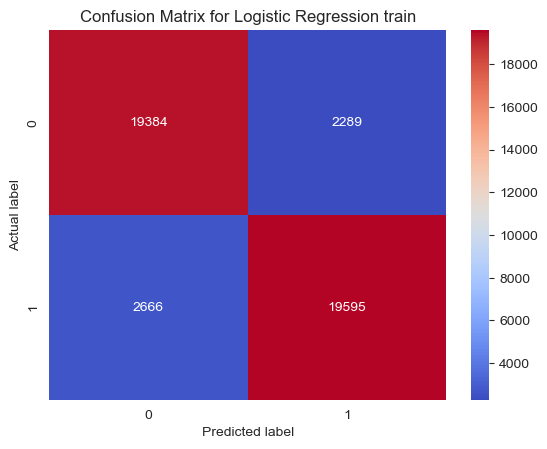

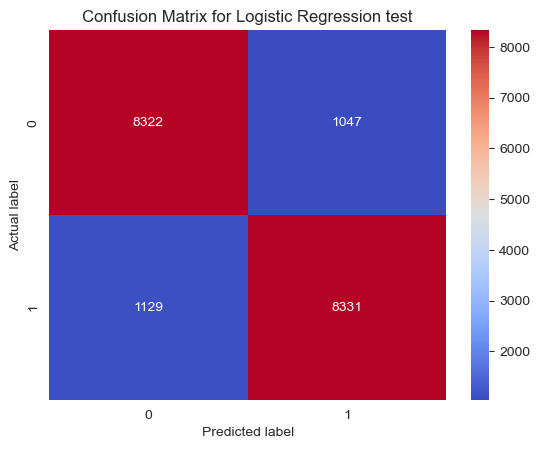

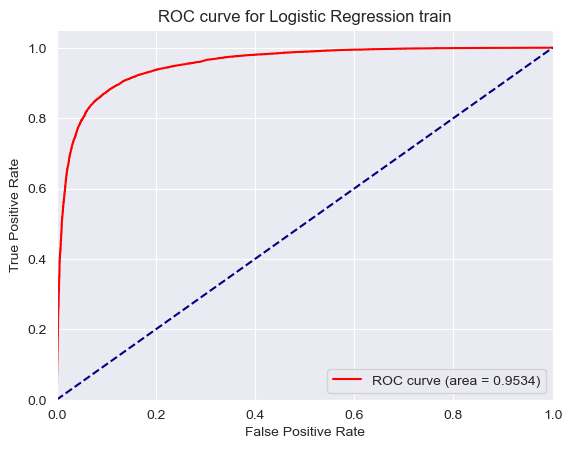

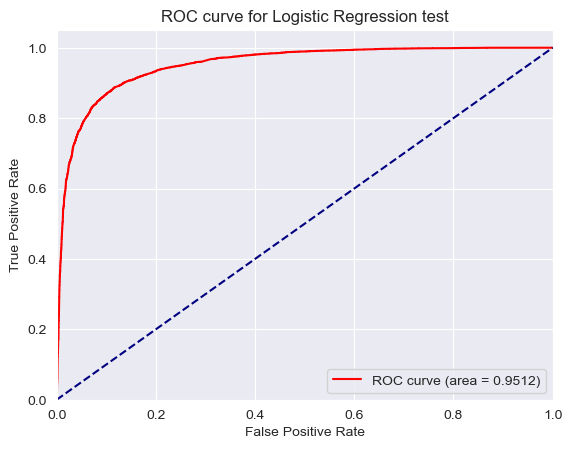

In [54]:
# 调用模型
save_dir = os.path.join(os.getcwd(), 'results_of_logistic')
sentiment = joblib.load(os.path.join(save_dir, 'sentiment_model.pkl'))
# 调用上面的函数绘制矩阵和roc曲线
draw_confusion_matrix(sentiment, X_train, X_test, y_train, y_test, 'Confusion Matrix for Logistic Regression')
plot_roc_curve(sentiment, X_train, y_train, 'ROC curve for Logistic Regression train')
plot_roc_curve(sentiment, X_test, y_test, 'ROC curve for Logistic Regression test')

### 神经网络

In [56]:
# 绘制混淆矩阵
def plot_confusion_matrix(cm, title):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


# 调用模型计算混淆矩阵
def draw_confusion_matrix(model, X_train, X_test, y_train, y_test, title):
    model.eval()
    with torch.no_grad():
        y_train_pred = model(X_train).cpu().numpy() > 0.5
        y_test_pred = model(X_test).cpu().numpy() > 0.5

    cm1 = confusion_matrix(y_train.cpu().numpy(), y_train_pred)
    cm2 = confusion_matrix(y_test.cpu().numpy(), y_test_pred)
    plot_confusion_matrix(cm1, title + ' train')
    plot_confusion_matrix(cm2, title + ' test')


# 绘制roc曲线
def plot_roc_curve(model, X, y, title):
    model.eval()
    with torch.no_grad():
        y_proba = model(X).cpu().numpy()

    fpr, tpr, thresholds = roc_curve(y.cpu().numpy(), y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc, color='red')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.legend(loc="lower right")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

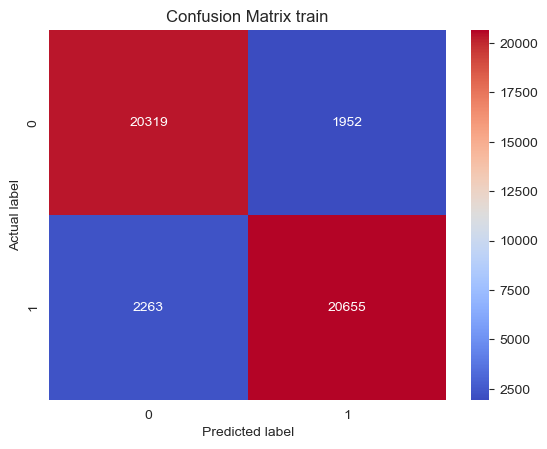

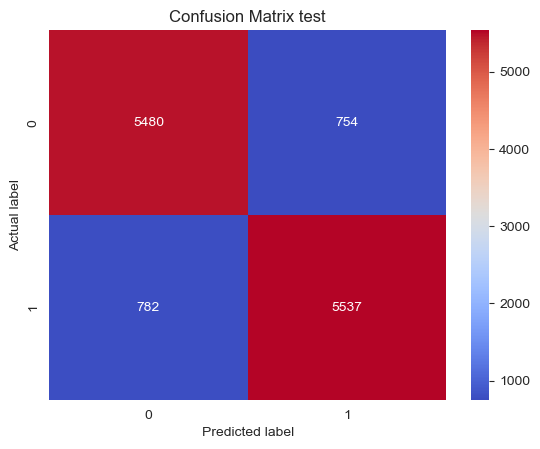

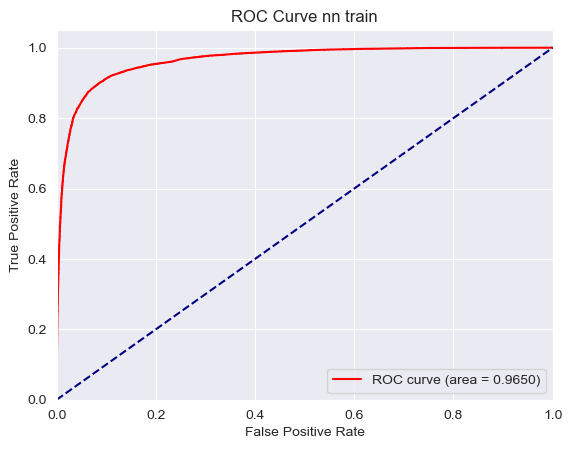

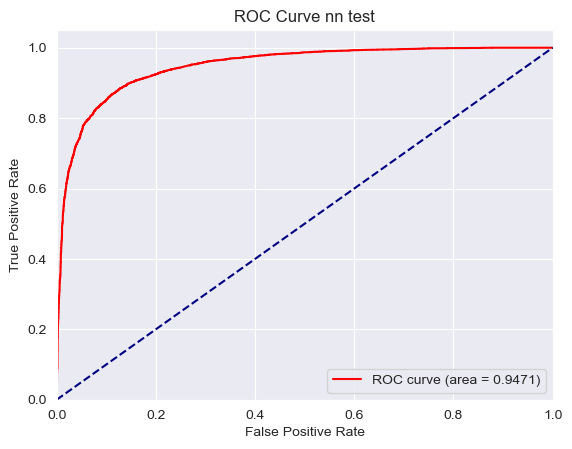

In [61]:
# 加载最优模型
save_dir = os.path.join(os.getcwd(), 'results_of_nn')
input_dim = X_train.shape[1]
model = SentimentAnalysisModel(input_dim).to(device)
model.load_state_dict(torch.load(os.path.join(save_dir, 'best_model.pth')))
#混淆矩阵
draw_confusion_matrix(model, X_train, X_test, y_train, y_test, 'Confusion Matrix')
# 绘制ROC曲线
plot_roc_curve(model, X_train, y_train, 'ROC Curve nn train')
plot_roc_curve(model, X_test, y_test, 'ROC Curve nn test')


## 思考1：我们共有10种商品的评论，直接全部用一个模型预测其情感倾向是否合理？如不合理请进行改进
并不合理，我们在训练时相当于直接抛弃了类别这一信息，但类别并不是冗余信息，其仍包含信息量
我认为，当类别种类少时，可以尝试针对每种商品训练一个模型，例如这里一共保存10个模型的最优权重
测试时，根据类别标签选择对应的权重，进行推测
当类别多时，可以考虑将类别放入X部分，作为信息参与训练。
由于本任务类别较少，我们可以选择方案一

分类别训练和测试在逻辑上和之前的存在区别，10个类别相当于要训练10次。训练集可以先根据类别划分再划分训练集和测试集，但是这样将不好获得总的准确率，并且也不太符合任务要求，理论上应该是模型能够自动根据类别选择模型来推理。
因此，我在main函数里划分训练集和测试集，在main函数里调用train模块10次，每次传入类别信息，训练并保存模型。

### Logistic

In [62]:
import os
import re
import jieba
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import joblib
import seaborn as sns

In [63]:
# 分词，过滤，绘图的工具函数

def create_stop_words_list():
    stop_word_path = os.path.join(os.path.join(os.getcwd(), 'stopwords'), 'baidu_stopwords.txt')
    zh_pattern = re.compile(u'[\u4e00-\u9fa5]+')
    stop_word = pd.read_csv(stop_word_path, header=None)
    stop_word = stop_word.values.reshape(-1)
    stop_word = [stop for stop in stop_word]
    stop_word.append(' ')
    return stop_word, zh_pattern


def extract_words(word, zh_pattern, stop_word):
    word = str(word).strip()
    zh_word = re.findall(zh_pattern, word)
    lst = jieba.cut(''.join(zh_word), cut_all=False)
    final_word = [char for char in lst if char not in stop_word]
    return ' '.join(final_word)


def tf_idf_(content):
    counter = CountVectorizer(max_df=0.8, min_df=0.001)
    counts = counter.fit_transform(content)

    tfidfer = TfidfTransformer()
    tfidf = tfidfer.fit_transform(counts)
    data_review_array = tfidf.toarray()
    return data_review_array, counter, tfidfer


def plot_confusion_matrix_(data, data_pred, title):
    cm = confusion_matrix(data, data_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


def plot_roc_curve(test_labels, probabilities):
    fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


In [64]:
# 将类别作为参数传给训练函数，训练时会筛选训练集对应的类别进行训练，并保存该类别的模型

def train_model_for_category(data, save_dir, category):
    stop_word, zh_pattern = create_stop_words_list()
    data_e = data['review'].apply(lambda x: extract_words(x, zh_pattern, stop_word))
    data_extract = pd.DataFrame(data_e.values, columns=['content'])

    data_frame = pd.DataFrame({"content": data_extract.squeeze(), "label": data['label'].values})
    data_review_array, counter, tfidfer = tf_idf_(data_frame.content)
    label = data_frame.label.values

    sentiment = LogisticRegression(penalty='l2', C=1.0)
    sentiment.fit(data_review_array, label)

    category_dir = os.path.join(save_dir, f'category_{category}')
    os.makedirs(category_dir, exist_ok=True)

    joblib.dump(sentiment, os.path.join(category_dir, 'sentiment_model.pkl'))
    joblib.dump(counter, os.path.join(category_dir, 'count_vectorizer.pkl'))
    joblib.dump(tfidfer, os.path.join(category_dir, 'tfidf_transformer.pkl'))

# 测试不需要传入类别，而是直接根据类别调用权重
# 但是这里有一个优化的点，逐行测试需要频繁从磁盘读入模型权重，要是一个类型一个类型地测试会更快
def predict_sentiment(test_data, save_dir):
    print("开始预测")
    stop_word, zh_pattern = create_stop_words_list()

    test_data['processed_review'] = test_data['review'].apply(lambda x: extract_words(x, zh_pattern, stop_word))

    predictions = []
    probabilities = []
    for index, row in test_data.iterrows():
        category = row['cat']
        category_dir = os.path.join(save_dir, f'category_{category}')
        sentiment = joblib.load(os.path.join(category_dir, 'sentiment_model.pkl'))
        counter = joblib.load(os.path.join(category_dir, 'count_vectorizer.pkl'))
        tfidfer = joblib.load(os.path.join(category_dir, 'tfidf_transformer.pkl'))

        input_counts = counter.transform([row['processed_review']])
        input_tfidf = tfidfer.transform(input_counts)
        prediction = sentiment.predict(input_tfidf)[0]
        probability = sentiment.predict_proba(input_tfidf)[:, 1][0]
        predictions.append(prediction)
        probabilities.append(probability)

    return predictions, probabilities

检测到模型已存在，将直接使用保存的模型推断。
如果希望自己训练，请删掉E:\workspace\TmallComments\results_of_cat_logistic文件夹或改名
开始预测
Overall accuracy on test set = 0.8901


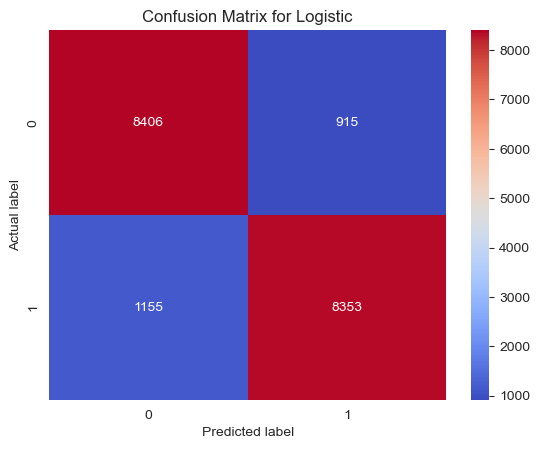

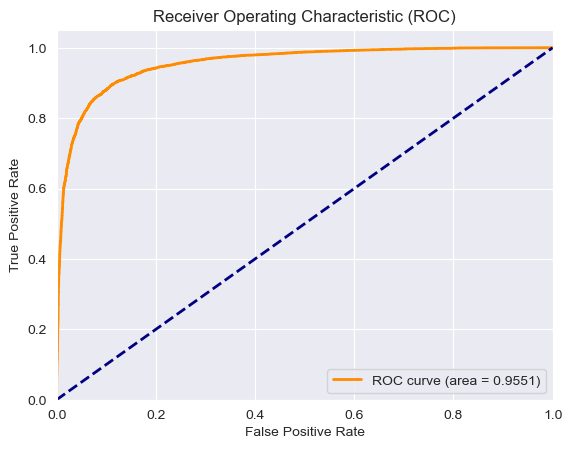

In [65]:
if __name__ == '__main__':
    save_dir = os.path.join(os.getcwd(), 'results_of_cat_logistic')

    data = pd.read_csv('online_shopping_10_cats.csv', header=0)
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

    categories = data['cat'].unique()

    # 如果已经有了保存文件，就不用训练了
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
        print(f"未检测到模型，将开始训练模型并推断。保存的模型见{save_dir}文件夹")
        for category in categories:
            print(f"开始训练类别: {category}")
            category_data = train_data[train_data['cat'] == category]
            train_model_for_category(category_data, save_dir, category)
    else:
        print(f"检测到模型已存在，将直接使用保存的模型推断。\n如果希望自己训练，请删掉{save_dir}文件夹或改名")

    test_labels = test_data['label'].values
    predictions, probabilities = predict_sentiment(test_data, save_dir)

    accuracy = accuracy_score(test_labels, predictions)
    print(f'Overall accuracy on test set = {accuracy:.4f}')

    # 绘制混淆矩阵
    plot_confusion_matrix_(test_labels, predictions, "Confusion Matrix for Logistic")

    # 绘制ROC曲线
    plot_roc_curve(test_labels, probabilities)

### 神经网络

In [71]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import jieba
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import re
from sklearn.metrics import accuracy_score

# 使用GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [72]:
class SentimentAnalysisModel(nn.Module):
    def __init__(self, input_dim):
        super(SentimentAnalysisModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.sigmoid(self.fc4(x))
        return x

In [73]:
# 工具函数

def create_stop_words_list():
    stop_word_path = os.path.join(os.getcwd(), 'stopwords', 'baidu_stopwords.txt')
    zh_pattern = re.compile(u'[\u4e00-\u9fa5]+')
    stop_word = pd.read_csv(stop_word_path, header=None)
    stop_word = stop_word.values.reshape(-1)
    stop_word = [stop for stop in stop_word]
    stop_word.append(' ')
    return stop_word, zh_pattern


def extract_words(word, zh_pattern, stop_word):
    word = str(word).strip()
    zh_word = re.findall(zh_pattern, word)
    lst = jieba.cut(''.join(zh_word), cut_all=False)
    final_word = [char for char in lst if char not in stop_word]
    return ' '.join(final_word)


def tf_idf_(content):
    counter = CountVectorizer(max_df=0.8, min_df=0.001)
    counts = counter.fit_transform(content)
    tfidfer = TfidfTransformer()
    tfidf = tfidfer.fit_transform(counts)
    data_review_array = tfidf.toarray()
    return data_review_array, counter, tfidfer


def plot_confusion_matrix(cm, classes, title='Test Set Confusion matrix'):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def plot_roc_curve(fpr, tpr, roc_auc, title='Test Set ROC Curve'):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [74]:
# 将类别作为参数传给训练函数，训练时会筛选训练集对应的类别划分训练集和验证集，训练，验证并保存该类别的模型
def train_model(save_dir, data, label, category):
    stop_word, zh_pattern = create_stop_words_list()
    data_e = data['review'].apply(lambda x: extract_words(x, zh_pattern, stop_word))
    data_extract = pd.DataFrame(data_e.values, columns=['content'])
    label = pd.DataFrame(label, columns=['label'])
    label.reset_index(drop=True, inplace=True)  # 重置索引，使其从0开始，不然会导致后续表格无法对齐，出现nan报错
    data_frame = pd.DataFrame({"content": data_extract.squeeze(), "label": label.squeeze()})

    data_review_array, counter, tfidfer = tf_idf_(data_frame.content)
    label = data_frame.label.values

    X = torch.tensor(data_review_array, dtype=torch.float32).to(device)
    y = torch.tensor(label, dtype=torch.float32).to(device)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=512, shuffle=True)

    input_dim = data_review_array.shape[1]
    model = SentimentAnalysisModel(input_dim).to(device)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=5e-5, weight_decay=1e-5)

    num_epochs = 200
    n = 1
    best_accuracy = 0.0
    best_epoch = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
        # epoch_loss = running_loss / len(train_loader.dataset)
        if (epoch + 1) % n == 0:
            model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
                    outputs = model(inputs)
                    predicted = (outputs > 0.5).float()
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            accuracy = correct / total
            print(f'Val Accuracy after epoch {epoch + 1}: {accuracy:.4f}')

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_epoch = epoch
                torch.save(model.state_dict(), os.path.join(save_dir, f'{category}_best_model.pth'))
            print(f"best epoch at : {best_epoch}, best accuracy : {best_accuracy}")

            with open(os.path.join(save_dir, f'{category}_log.txt'), 'a') as log_file:
                log_file.write(f'Epoch {epoch + 1}: Val Accuracy: {accuracy:.4f}\n')

    joblib.dump(counter, os.path.join(save_dir, f'{category}_count_vectorizer.pkl'))
    joblib.dump(tfidfer, os.path.join(save_dir, f'{category}_tfidf_transformer.pkl'))

# 测试不需要传入类别，而是直接根据类别调用权重
# 这里优化了上面logistic测试那里存在的问题：逐行测试需要频繁从磁盘读入模型权重。这里一个类型一个类型地测试更快
def test_models(data, save_dir):
    categories = data['cat'].unique()
    overall_correct = 0
    overall_total = 0
    all_labels = []
    all_predictions = []
    all_probabilities = []

    for category in categories:
        category_data = data[data['cat'] == category]
        stop_word, zh_pattern = create_stop_words_list()
        data_e = category_data['review'].apply(lambda x: extract_words(x, zh_pattern, stop_word))
        counter = joblib.load(os.path.join(save_dir, f'{category}_count_vectorizer.pkl'))
        tfidfer = joblib.load(os.path.join(save_dir, f'{category}_tfidf_transformer.pkl'))
        input_dim = counter.transform(['']).shape[1]
        model = SentimentAnalysisModel(input_dim).to(device)
        model.load_state_dict(torch.load(os.path.join(save_dir, f'{category}_best_model.pth')))
        model.eval()

        data_review_array = tfidfer.transform(counter.transform(data_e))
        X = torch.tensor(data_review_array.toarray(), dtype=torch.float32).to(device)
        y = torch.tensor(category_data['label'].values, dtype=torch.float32).to(device)

        with torch.no_grad():
            outputs = model(X)
            predictions = (outputs > 0.5).float()
            probabilities = outputs.cpu().numpy()

            correct = (predictions == y.view(-1, 1)).sum().item()
            total = y.size(0)

            all_labels.extend(y.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
            all_probabilities.extend(probabilities)

        overall_correct += correct
        overall_total += total

    overall_accuracy = overall_correct / overall_total
    print(f'Overall Test Accuracy: {overall_accuracy:.4f}')

    # 计算混淆矩阵
    cm = confusion_matrix(all_labels, all_predictions)
    plot_confusion_matrix(cm, classes=['Negative', 'Positive'])

    # 计算并绘制ROC曲线
    fpr, tpr, _ = roc_curve(all_labels, all_probabilities)
    roc_auc = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, roc_auc)

书籍 的模型已经存在，将使用已保存文件
平板 的模型已经存在，将使用已保存文件
手机 的模型已经存在，将使用已保存文件
水果 的模型已经存在，将使用已保存文件
洗发水 的模型已经存在，将使用已保存文件
热水器 的模型已经存在，将使用已保存文件
蒙牛 的模型已经存在，将使用已保存文件
衣服 的模型已经存在，将使用已保存文件
计算机 的模型已经存在，将使用已保存文件
酒店 的模型已经存在，将使用已保存文件
Overall Test Accuracy: 0.8934


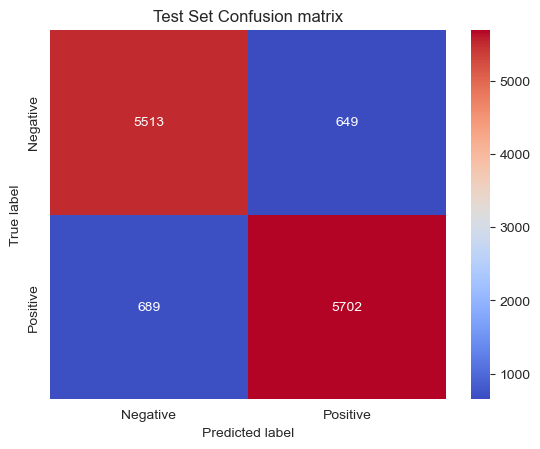

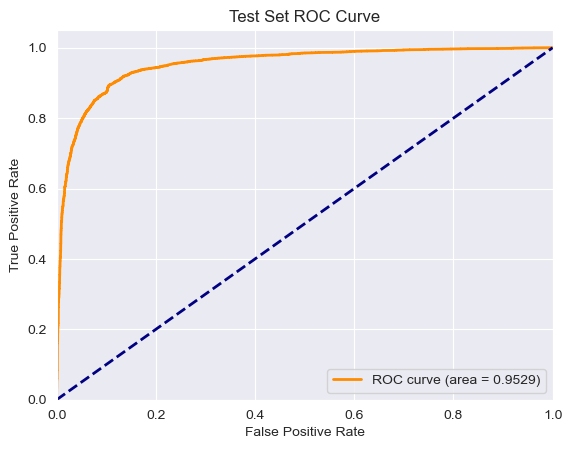

In [75]:
def main():
    # 确保 results_of_nn 文件夹存在
    if not os.path.exists('results_of_cat'):
        os.makedirs('results_of_cat')

    save_dir = os.path.join(os.getcwd(), 'results_of_cat')
    os.makedirs(save_dir, exist_ok=True)

    data = pd.read_csv('online_shopping_10_cats.csv')  # 加载训练数据
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
    categories = data['cat'].unique()

    for category in categories:
        category_data = train_data[train_data['cat'] == category]
        if not all(os.path.exists(os.path.join(save_dir, f'{category}_{file}')) for file in
                   ['best_model.pth', 'count_vectorizer.pkl', 'tfidf_transformer.pkl']):
            print(f'开始训练类别: {category}')
            train_model(save_dir, category_data, category_data['label'], category)
        else:
            print(f'{category} 的模型已经存在，将使用已保存文件')

    test_models(test_data, save_dir)


if __name__ == "__main__":
    main()

## 思考2：尝试对你的结果做出解释，并帮助商家改进商品

改进结果：

| 模型          | 准确率(%) | AUC-ROC |   F1   |
|:------------|:------:|:-------:|:------:|
| Logistic改进前 | 88.44  | 0.9512  | 0.8844 |
| Logistic改进后 | 89.01  | 0.9551  | 0.8904 |
| 神经网络改进前     | 87.76  | 0.9471  | 0.8771 |
| 神经网络改进后     | 89.34  | 0.9529  | 0.8918 |

由于我们在特征向量里加入了类别信息，模型的准确率提升是可以预料到的。我们仅仅在训练上做出了改进，模型方面并没有很大变动就可以略微提高模型的精度，不过，也许正是因为这个原因，模型的提升并没有很大。